# CEN426 - Introduction to Machine Learning Task 3
---
The student must use both Naive Bayes and Linear Regression to classify a sample dataset, then interpret the results.

### Student Name: Furkan Çetinkaya
### Student ID: 2016556017

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
from sklearn.decomposition   import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes     import GaussianNB
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import accuracy_score
%matplotlib inline

### Read the dataset

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
X = df.drop(['smoker', 'sex', 'region'], axis=1)
y = df['smoker']

In [4]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new

array([[ 3.61449421e+03,  2.15465146e+01],
       [-1.15448763e+04,  1.70679888e+01],
       [-8.82096333e+03,  8.04371807e+00],
       ...,
       [-1.16405948e+04,  1.69451843e+01],
       [-1.12624833e+04,  1.44067635e+01],
       [ 1.58709444e+04, -1.61831291e+01]])

In [5]:
k = 2                                       
kfold = KFold(n_splits=k)
NBmodel = GaussianNB()
LRmodel = LinearRegression()

test_sets = [] 
NB_accs = []
LR_accs = []
NB_preds = []
LR_preds = []

i = 0
for train_index , test_index in kfold.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    test_sets.append(X_test)
    NBmodel.fit(X_train,y_train)
    LRmodel.fit(X_train, y_train)
    NB_preds.append(NBmodel.predict(X_test))
    LR_pred = LRmodel.predict(X_test)
    LR_pred[LR_pred < LR_pred.mean()] = 0
    LR_pred[LR_pred >= LR_pred.mean()] = 1
    LR_preds.append(LR_pred)
    NB_accs.append(accuracy_score(NB_preds[i], y_test))
    LR_accs.append(accuracy_score(LR_preds[i], y_test))
    print("NaiveBayes       Fold %d, Accuracy: %f"%(i,NB_accs[i]))
    print("LinearRegression Fold %d, Accuracy: %f"%(i,LR_accs[i]))
    i += 1

NaiveBayes       Fold 0, Accuracy: 0.902840
LinearRegression Fold 0, Accuracy: 0.923767
NaiveBayes       Fold 1, Accuracy: 0.901345
LinearRegression Fold 1, Accuracy: 0.932735


In [6]:
print("NaiveBayes       Average Accuracy: %f"%(np.sum(NB_accs)/k))
print("LinearRegression Average Accuracy: %f"%(np.sum(LR_accs)/k))

NaiveBayes       Average Accuracy: 0.902093
LinearRegression Average Accuracy: 0.928251


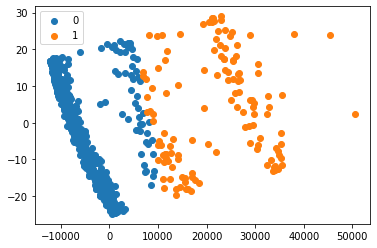

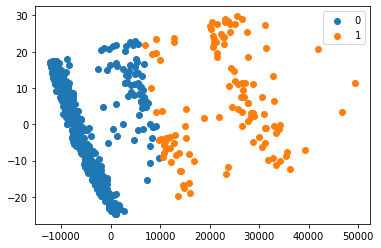

In [7]:
for i in range(k):
    y = NB_preds[i]
    X_test = test_sets[i]
    label_names = np.unique(y)             # Get unique label names
    for j in label_names:                    # Plot distribution
        plt.scatter(X_test[y == j , 0] , X_test[y == j , 1] , label = j)
    plt.legend()
    plt.show()

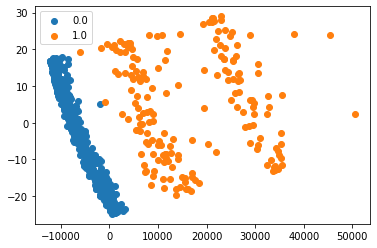

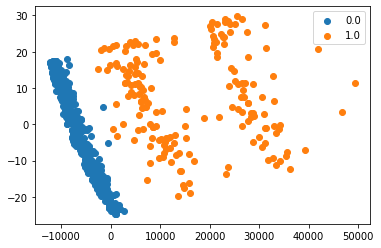

In [8]:
for i in range(k):
    y = LR_preds[i]
    X_test = test_sets[i]
    label_names = np.unique(y)             # Get unique label names
    for j in label_names:                    # Plot distribution
        plt.scatter(X_test[y == j , 0] , X_test[y == j , 1] , label = j)
    plt.legend()
    plt.show()